<a href="https://colab.research.google.com/github/priya-200/DeepFake-audio-Detection---Deep-Learning/blob/main/DEEPFAKE_AUDIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔊 **Deepfake Audio Detection**

## 📌 **Introduction**  
With the rise of **deepfake technologies**, AI-generated voices are being used for **fraud, misinformation, and identity theft**. Detecting **synthetic audio** is crucial to prevent misuse.  

This project aims to **detect deepfake audio** using **Machine Learning (ML) and Deep Learning (DL)** by analyzing **Mel-Frequency Cepstral Coefficients (MFCCs), spectrograms, and other audio features**.

---

## 📂 **Dataset**  
We are using the **Fake or Real Dataset** from Kaggle, which contains real and AI-generated audio samples.

**📌 Dataset Source:** [Fake or Real Dataset on Kaggle](https://www.kaggle.com/datasets/mohammedabdeldayem/the-fake-or-real-dataset)  

To download the dataset, run the following command in a Colab cell:  

```bash
!kaggle datasets download mohammedabdeldayem/the-fake-or-real-dataset
```

1️⃣ Data Preprocessing
* Load Audio Files (.wav format) using librosa.
* Convert Raw Waveform to Spectrograms using Short-Time Fourier Transform (STFT).
* Extract MFCCs (Mel-Frequency Cepstral Coefficients).
* Compute Additional Features (Chroma, Zero-Crossing Rate, Spectral Centroid).
<br>
2️⃣ Feature Engineering
* Spectrograms for deep learning models (CNNs).
* MFCCs and other statistical features for traditional ML models (SVM, Random Forest).
<br>
3️⃣ Model Training
* Machine Learning: Random Forest, XGBoost on extracted features.
* Deep Learning: CNNs or LSTMs on spectrogram images.
<br>
4️⃣ Model Evaluation
* Use accuracy, precision, recall, and F1-score to measure performance.
* Compare ML vs. DL approaches.
<br>
5️⃣ Deployment
* Deploy as a Streamlit/Flask web app for real-time deepfake detection.


# Get the dataset

In [ ]:
!kaggle datasets download mohammedabdeldayem/the-fake-or-real-dataset

Dataset URL: https://www.kaggle.com/datasets/mohammedabdeldayem/the-fake-or-real-dataset
License(s): GNU Lesser General Public License 3.0
100% 16.0G/16.0G [03:06<00:00, 104MB/s]
100% 16.0G/16.0G [03:06<00:00, 92.3MB/s]


In [ ]:
# unzip the file

!unzip the-fake-or-real-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: for-rerec/for-rerecorded/training/real/recording12954.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12955.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12956.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12957.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12958.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12959.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12961.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12962.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12965.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12966.wav_norm_mono.wav  
  inflating: for-rerec/for-rerecorded/training/real/recording12967.wav_norm_mon

## Import the nessasary libraries

In [ ]:
# General library
import os
import numpy as np
import random

# For dealining with audio files
import librosa

# For visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns


# For model building
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv2D, BatchNormalization, Dropout, MaxPool2D, Flatten, Dense, ReLU, Add,Input,MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

## File path declaration

In [ ]:
## The file path of the directory

train_real_directory = "/content/for-2sec/for-2seconds/training/real"
train_fake_directory = "/content/for-2sec/for-2seconds/training/fake"

val_real_directory = "/content/for-2sec/for-2seconds/validation/real"
val_fake_directory = "/content/for-2sec/for-2seconds/validation/fake"

test_real_directory = "/content/for-2sec/for-2seconds/testing/real"
test_fake_directory = "/content/for-2sec/for-2seconds/testing/fake"

## Get all the list of files

In [ ]:
# Get the path of the audio files in with the extention (.wav)

train_real_audio = [
    os.path.join(train_real_directory,file) for file in os.listdir(train_real_directory) if file.endswith('.wav')
]

train_fake_audio = [
    os.path.join(train_fake_directory,file) for file in os.listdir(train_fake_directory) if file.endswith('.wav')
]

validation_real_audio = [
    os.path.join(val_real_directory, file) for file in os.listdir(val_real_directory) if file.endswith('.wav')
]
validation_fake_audio = [
    os.path.join(val_fake_directory, file) for file in os.listdir(val_fake_directory) if file.endswith('.wav')
]

test_real_audio = [os.path.join(test_real_directory, file) for file in os.listdir(test_real_directory) if file.endswith('.wav')]
test_fake_audio = [os.path.join(test_fake_directory, file) for file in os.listdir(test_fake_directory) if file.endswith('.wav')]

In [ ]:
len(train_real_audio),len(train_fake_audio) # Number of real and fake audio files in training dataset

(6978, 6978)

In [ ]:
len(test_real_audio),len(test_fake_audio) # Number of real and fake audio in test dataset

(544, 544)

In [ ]:
len(validation_real_audio),len(validation_fake_audio) # Number of real and fake audio in validation dataset

(1413, 1413)

## Preprocessing and Analysis

In [ ]:
random_audio_sample = random.choice(train_fake_audio)
ipd.Audio(random_audio_sample) # Inspecting a Fake audio file

In [ ]:
random_audio_sample = random.choice(train_real_audio)
ipd.Audio(random_audio_sample) # Inspecting a Real audio file

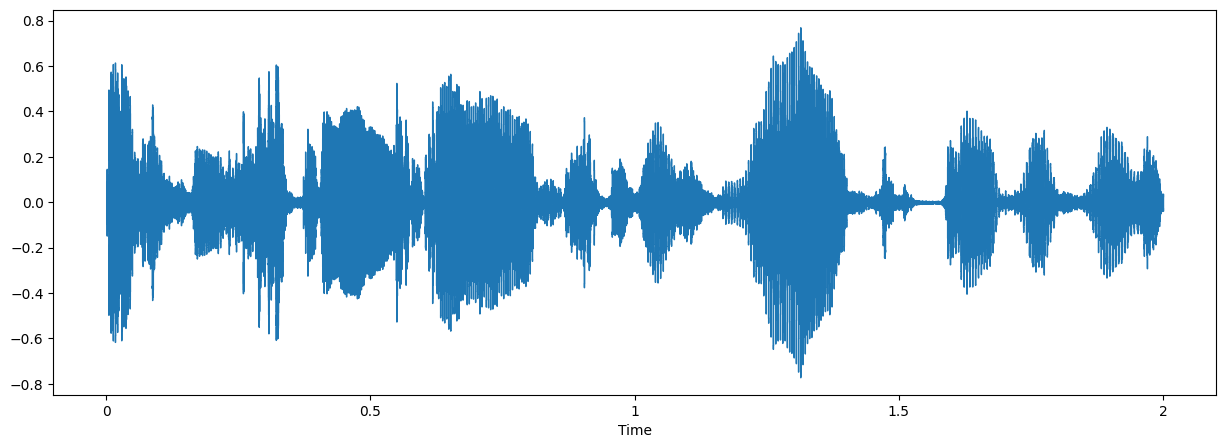

In [ ]:
# Visualize the above audio sample as a audio wave

audio_file, sample_rate = librosa.load(random_audio_sample)
plt.figure(figsize = (15,5))
librosa.display.waveshow(audio_file,sr = sample_rate)

1. **librosa.load()** is used to load an audio file into Python. It converts the audio into a numerical array (called a waveform) and returns the sample rate.
2. **Sample rate:**
 * sr stands for sampling rate (measured in Hz).
 * It tells how many samples per second are taken from the audio.
 * Higher sr means better quality but larger file size.

**In simple word:**
 Imagine audio as a continuous wave, and sampling is like taking snapshots at regular intervals.
A higher sr means more snapshots per second, capturing more details of the sound.

📌**What is a Spectrogram?**
<br>
A spectrogram is a visual representation of sound. It shows how the frequencies of an audio signal change over time.

Simply put:
*  X-axis (horizontal) → Time (seconds)
*  Y-axis (vertical) → Frequency (Hz)
*  Color/Intensity → Amplitude (loudness)

💡 Think of it as a "heatmap" of sound! 🎵🔥m
<br>

🎧 ***Why do we need a Spectrogram?***
* Human ears process sound in frequency + time, not raw waveforms.
* Machine Learning models learn better from spectrogram images than raw audio.
* Deepfake voices may have different frequency patterns than real ones.

📊 ***Types of Spectrograms***
1. Linear Spectrogram

  * Shows raw frequency data.
  * Not ideal for speech/audio analysis.
2. Mel Spectrogram (Better for Speech & Audio)
  * Uses the Mel scale, *which mimics human hearing.*
  * Good for speech recognition & deepfake detection.
  * Created using Short-Time Fourier Transform (STFT) + Mel Filter.
3. MFCCs (Mel-Frequency Cepstral Coefficients) 🔥

   * Extracts key frequency features from speech.
   * Used in speech and deepfake detection.
   * More compact & efficient than Mel Spectrogram.


In [ ]:
def create_mel_spectrogram(file_path):
  audio_file, sample_rate = librosa.load(file_path)

  # Convert the audio into mel-based spectrogram
  mel_spectrogram = librosa.feature.melspectrogram(
      y = audio_file,sr = sample_rate
  )

  # Convert the amplitude squared to decibel units

  # Raw amplitude values are not human-friendly so we convert the amplitude squared
  mel_decibel_spectrogram = librosa.power_to_db(
      mel_spectrogram,ref = np.max
  )

  return mel_decibel_spectrogram

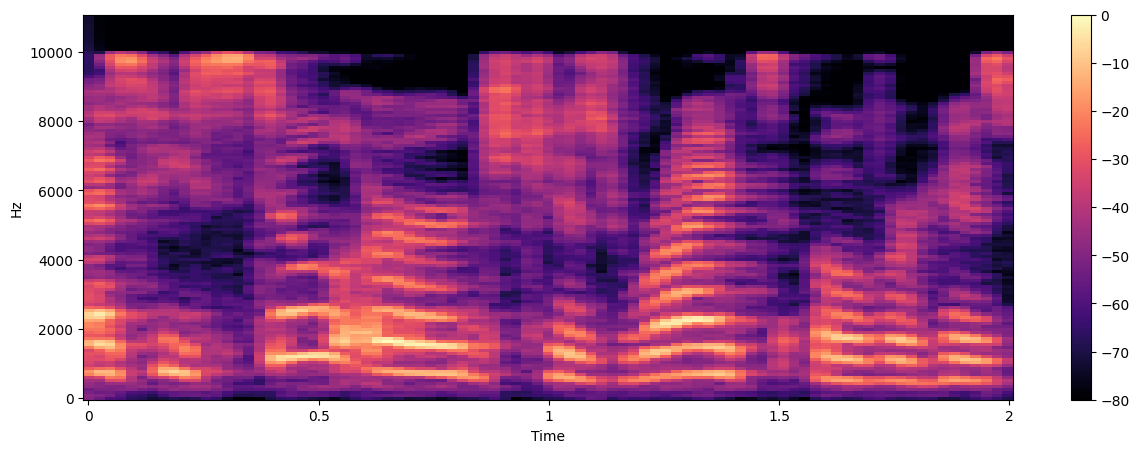

In [ ]:
# Spectrogram representation visually

sample_spectrogram = create_mel_spectrogram(
    random_audio_sample
)
plt.figure(figsize=(15,5))
librosa.display.specshow(sample_spectrogram,x_axis='time',y_axis='hz')
plt.colorbar()

In [ ]:
# Use spectrograms as features to train the model

def get_features_and_label(real_audio_files,fake_audio_files):
  spec_arr = []
  labels = []

  for file in real_audio_files:
    spectrogram = create_mel_spectrogram(file)
    spec_arr.append(spectrogram)
    labels.append(0)

  for file in fake_audio_files:
    spectrogram = create_mel_spectrogram(file)
    spec_arr.append(spectrogram)
    labels.append(1)

  return np.array(spec_arr),np.array(labels)

train_features,train_labels = get_features_and_label(
    train_real_audio,train_fake_audio
)

validation_features,validation_labels = get_features_and_label(
    validation_real_audio,validation_fake_audio
)

test_features, test_labels = get_features_and_label(
    test_real_audio,test_fake_audio
)

## Building a model

we've essentially converted audio into images for machine learning purpose

In [ ]:
print("train features shape: {}".format(train_features.shape))
print("test features shape: {}".format(test_features.shape))

train features shape: (13956, 128, 87)
test features shape: (1088, 128, 87)


In [ ]:
trimmed_vgg = Sequential()
trimmed_vgg.add(Reshape((128, 87, 1),input_shape=train_features.shape[1:]))

trimmed_vgg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
trimmed_vgg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
trimmed_vgg.add(BatchNormalization())
trimmed_vgg.add(Dropout(0.5))
trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

trimmed_vgg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
trimmed_vgg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
trimmed_vgg.add(BatchNormalization())
trimmed_vgg.add(Dropout(0.5))
trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#trimmed_vgg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
#trimmed_vgg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
##trimmed_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
#trimmed_vgg.add(BatchNormalization())
#trimmed_vgg.add(Dropout(0.5))
#trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#trimmed_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
#trimmed_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
#trimmed_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
#trimmed_vgg.add(BatchNormalization())
#trimmed_vgg.add(Dropout(0.3))
#trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#trimmed_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'))
#trimmed_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'))
##trimmed_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'))
#trimmed_vgg.add(BatchNormalization())
#trimmed_vgg.add(Dropout(0.3))
#trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

trimmed_vgg.add(Flatten())
trimmed_vgg.add(Dense(units=128,activation="relu"))
trimmed_vgg.add(Dense(units=164,activation="relu"))
trimmed_vgg.add(Dense(1, activation="sigmoid"))

trimmed_vgg.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_9 (Reshape)                  │ (None, 128, 87, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 128, 87, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 128, 87, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 128, 87, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128, 87, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 64, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 64, 43, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_96 (Conv2D)                   │ (None, 64, 43, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 64, 43, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 32, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 21504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │       5,505,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,599,649 (21.36 MB)

 Trainable params: 5,599,521 (21.36 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
trimmed_vgg = Sequential()
trimmed_vgg.add(Reshape((128, 87, 1), input_shape=train_features.shape[1:]))

# Conv Block 1
trimmed_vgg.add(Conv2D(4, (3,3), padding="same", activation='relu', kernel_regularizer=l2(0.0005)))
trimmed_vgg.add(Conv2D(4, (3,3), padding="same", activation='relu', kernel_regularizer=l2(0.0005)))
trimmed_vgg.add(BatchNormalization())
trimmed_vgg.add(Dropout(0.5))
trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Conv Block 2
trimmed_vgg.add(Conv2D(4, (3,3), padding="same", activation='relu', kernel_regularizer=l2(0.0005)))
trimmed_vgg.add(Conv2D(4, (3,3), padding="same", activation='relu', kernel_regularizer=l2(0.0005)))
trimmed_vgg.add(BatchNormalization())
trimmed_vgg.add(Dropout(0.5))
trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#Conv Block 3
trimmed_vgg.add(Conv2D(4, (3,3), padding="same", activation='relu', kernel_regularizer=l2(0.0005)))
trimmed_vgg.add(Conv2D(4, (3,3), padding="same", activation='relu', kernel_regularizer=l2(0.0005)))
trimmed_vgg.add(BatchNormalization())
trimmed_vgg.add(Dropout(0.5))
trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Flatten and Dense Layers
trimmed_vgg.add(Flatten())
trimmed_vgg.add(Dense(64, activation="relu"))
trimmed_vgg.add(Dropout(0.5))
trimmed_vgg.add(Dense(32, activation="relu"))
trimmed_vgg.add(Dense(1, activation="sigmoid"))

In [ ]:
train_features[0].shape

(128, 87)

In [ ]:
Model = Sequential()
Model.add(Reshape((128, 87, 1),input_shape=(128, 87)))

Model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='selu', kernel_regularizer=l2(0.02)))
Model.add(BatchNormalization())
Model.add(Dropout(0.4))
Model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='selu', kernel_regularizer=l2(0.02)))
Model.add(BatchNormalization())
Model.add(Dropout(0.4))
Model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

Model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='selu',kernel_regularizer=l2(0.03)))
Model.add(BatchNormalization())
Model.add(Dropout(0.4))
Model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='selu',kernel_regularizer=l2(0.03)))
Model.add(BatchNormalization())
Model.add(Dropout(0.4))
Model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

Model.add(Flatten())
Model.add(Dense(units=64,activation="selu"))
Model.add(Dropout(0.5))
Model.add(Dense(units=32,activation="selu"))
Model.add(Dense(1, activation="sigmoid"))

Model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_7 (Reshape)                  │ (None, 128, 87, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 128, 87, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 128, 87, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 128, 87, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 128, 87, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 64, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 88064)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │       5,636,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,648,097 (21.55 MB)

 Trainable params: 5,647,969 (21.55 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
Model = Sequential([
    Reshape((128, 87, 1),input_shape=(128, 87)),

    Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    #Dropout(0.5),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    #Dropout(0.5),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss=tf.keras.losses.binary_crossentropy,
                    metrics=["accuracy"])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = Model.fit(train_features, train_labels,
                          epochs=5,
                          batch_size=32,
                          validation_data=(validation_features, validation_labels),
                          callbacks=[early_stopping])

Epoch 1/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8239 - loss: 1.2644 - val_accuracy: 0.9363 - val_loss: 0.8025
Epoch 2/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9725 - loss: 0.6692 - val_accuracy: 0.9943 - val_loss: 0.4925
Epoch 3/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9894 - loss: 0.4672 - val_accuracy: 0.9915 - val_loss: 0.3707
Epoch 4/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9930 - loss: 0.3433 - val_accuracy: 0.9926 - val_loss: 0.2786
Epoch 5/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9960 - loss: 0.2521 - val_accuracy: 0.9632 - val_loss: 0.2898


In [ ]:
test_loss, test_accuracy = Model.evaluate(test_features, test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8271 - loss: 0.9879


In [ ]:
test_loss, test_acc = Model.evaluate(test_features, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8271 - loss: 0.9879
Test Accuracy: 56.71%


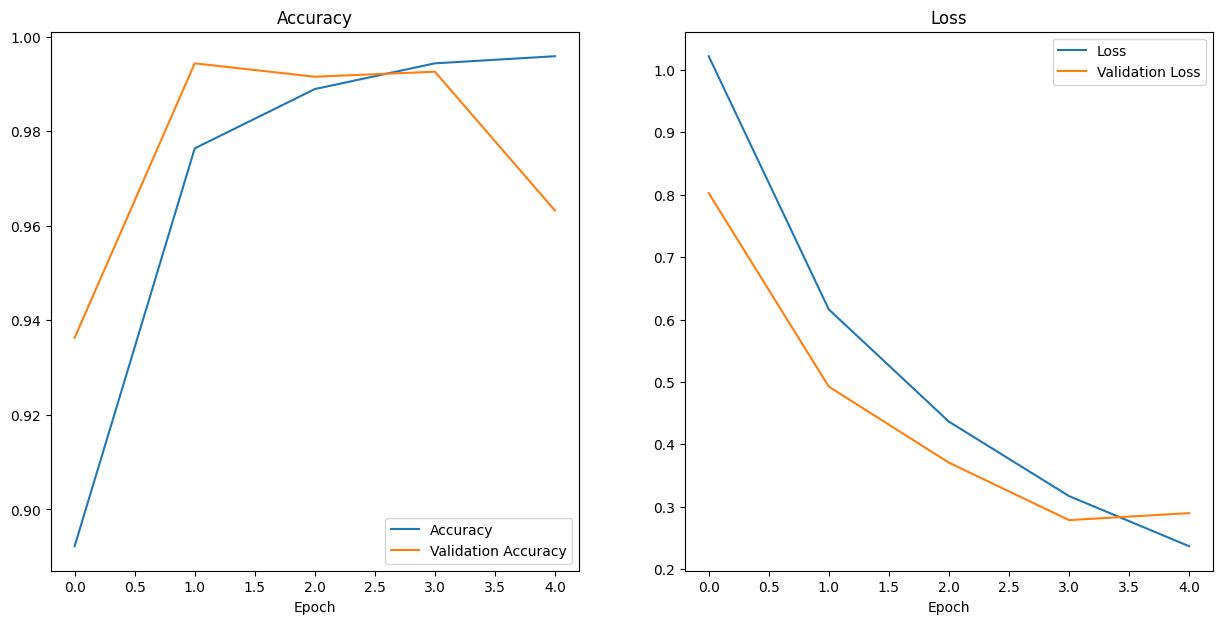

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.plot(history.history["accuracy"])
ax1.plot(history.history['val_accuracy'])
ax1.set_title("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend(["Accuracy","Validation Accuracy"])

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_title("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(["Loss","Validation Loss"])

plt.show()

In [ ]:
# Test Data Results

trimmed_vgg_loss, trimmed_vgg_accuracy = Model.evaluate(test_features, test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8271 - loss: 0.9879


In [ ]:
# Saving the final version

trimmed_vgg.save('deepfake_audio_detector.h5')